## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [2]:
# %pip install pandas numpy scikit-learn matplotlib pycaret lightgbm xgboost catboost

In [3]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [4]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_47.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_47.csv')

In [5]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_47.csv')

# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']


### 인코딩 

In [7]:
Total_categorical_columns = [
    "시술_당시_나이",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [8]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [9]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pycaret.classification import *

In [ ]:
# PyCaret 설정
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X,
                                                                            Total_y,
                                                                            test_size=0.2,
                                                                            random_state=42,
                                                                            stratify=Total_y)

# PyCaret 설정
clf = setup(data=Total_train, target='임신_성공_여부', session_id=42)

# 모델 비교 및 최상의 모델 선택
best_model = compare_models(n_select=1, sort='AUC')

# 최상의 모델 학습
final_model = finalize_model(best_model)

,Description,Value
0,Session id,42
1,Target,임신_성공_여부
2,Target type,Binary
3,Original data shape,"(256344, 96)"
4,Transformed data shape,"(256344, 112)"
5,Transformed train set shape,"(179440, 112)"
6,Transformed test set shape,"(76904, 112)"
7,Numeric features,91
8,Categorical features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7417,0.7273,0.0000,0.0000,0.0000,0.0000,0.0000,1.2960
lr,Logistic Regression,0.7416,0.7188,0.0001,0.2000,0.0001,0.0000,0.0005,6.8080
svm,SVM - Linear Kernel,0.7385,0.6434,0.0336,0.3550,0.0474,0.0214,0.0333,1.5640
knn,K Neighbors Classifier,0.7169,0.6433,0.2059,0.4057,0.2732,0.1201,0.1308,9.9710
rf,Random Forest Classifier,0.7417,0.6384,0.0000,0.0000,0.0000,0.0000,0.0000,5.4360
et,Extra Trees Classifier,0.7417,0.6209,0.0000,0.1000,0.0001,0.0000,0.0012,6.0820
xgboost,Extreme Gradient Boosting,0.7417,0.5577,0.0000,0.0000,0.0000,0.0000,0.0000,2.0120
qda,Quadratic Discriminant Analysis,0.7416,0.5378,0.0000,0.0000,0.0000,-0.0000,-0.0004,4.1550
nb,Naive Bayes,0.7417,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3540
dt,Decision Tree Classifier,0.7417,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2170


KeyError: "['ID'] not in index"

--- Model Performance ---
Model Accuracy: 0.7420858608515867
Model F1 Score: 0.0633279025288659
Model AUC: 0.7264147638133138


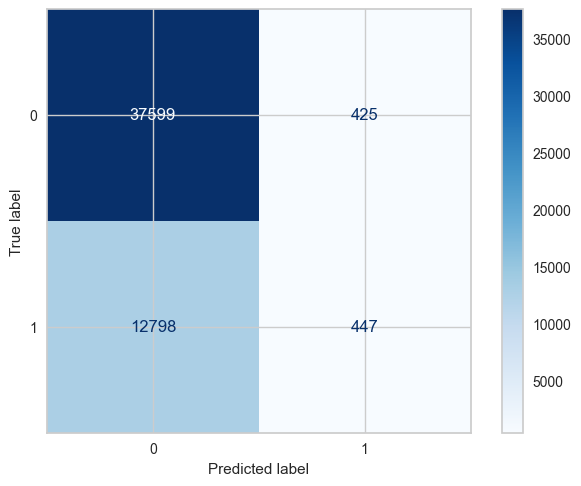

In [13]:
# 모델 학습
final_model.fit(Total_X_train, Total_y_train)

# 예측
y_pred = final_model.predict(Total_X_test)
y_pred_scores = final_model.decision_function(Total_X_test)

# 평가 지표 계산
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_scores)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# %pip install optuna

In [ ]:
# # 데이터 로드 및 전처리 (X_train, X_valid, y_train, y_valid)
# from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# import optuna

# def objective(trial):
#     alpha = trial.suggest_float('alpha', 0.1, 10.0)
#     solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])

#     model = RidgeClassifier(
#         alpha=alpha,
#         solver=solver,
#         random_state=42
#     )

#     model.fit(X_train, y_train)
#     preds = model.predict(X_valid)
#     score = accuracy_score(y_valid, preds)
#     return score

# X_train, X_valid, y_train, y_valid = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42, stratify=Total_y)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=300)

# print('Best trial:', study.best_trial.params)
# print('Best score:', study.best_value)

[I 2025-02-22 00:21:55,170] A new study created in memory with name: no-name-8b33a344-9698-4688-ae0f-7a29c8864bdb
[I 2025-02-22 00:21:55,494] Trial 0 finished with value: 0.7422223955996802 and parameters: {'alpha': 8.342488470720877, 'solver': 'auto'}. Best is trial 0 with value: 0.7422223955996802.
[I 2025-02-22 00:21:58,320] Trial 1 finished with value: 0.7422223955996802 and parameters: {'alpha': 9.686527009154059, 'solver': 'svd'}. Best is trial 0 with value: 0.7422223955996802.


Public 데이콘 0.72470936

In [10]:
# 필요한 라이브러리 임포트
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

# RidgeClassifier 모델 정의
Total_model = RidgeClassifier(random_state=42)

# 모든 학습 데이터를 사용하여 모델 학습
Total_model.fit(Total_X, Total_y)

# 테스트 데이터 예측
Total_pred_scores = Total_model.decision_function(Total_test.drop('ID', axis=1))

# 예측 점수를 테스트 데이터에 추가
Total_test['probability'] = Total_pred_scores

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code47_all_ridge.csv', index=False, encoding='utf-8')

.